**Limits perturbatively**

my equation DeltaH/A = gamma/4 (k^2 r^2 -1)+ kappa / (8r^2) (3 + (4H-1)k^2r^2 + 2 k^4 r^4)

solutions are

(rename g = gamma/kappa r^2

h = H r 

and set r=1)


k* = 1/(2r) sqrt{1-2g-8h + sqrt{8(2g-3)+(-1+8h+22g)^2} }

in case of h=0:

k* = 1/(2r) sqrt{1-2g + sqrt{4g^2+12g-23} }

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate

firsttime=False

plt.rcParams["figure.figsize"]=10,10
plt.rcParams['font.size'] = '18'

In [42]:
def kcrit(g,h):
    discriminant1 =8*(2*g-3)+(-1+8*h+2*g)**2
    #discriminant1 =-23 + 12* g+4 * g**2
    if discriminant1<0:
        return None
    else:
        discriminant2 = 1-2*g-8*h +  math.sqrt(discriminant1)
        #print(discriminant2)
        if discriminant2 <0:
            return None
        else:
            return .5*math.sqrt(discriminant2)

In [4]:
gs = list(np.arange(0.001, 10, .001))
gs.extend([20,50,100,200,500,1000])
kcrits_ = [kcrit(g, h=0) for g in gs]

Text(0, 0.5, 'k')

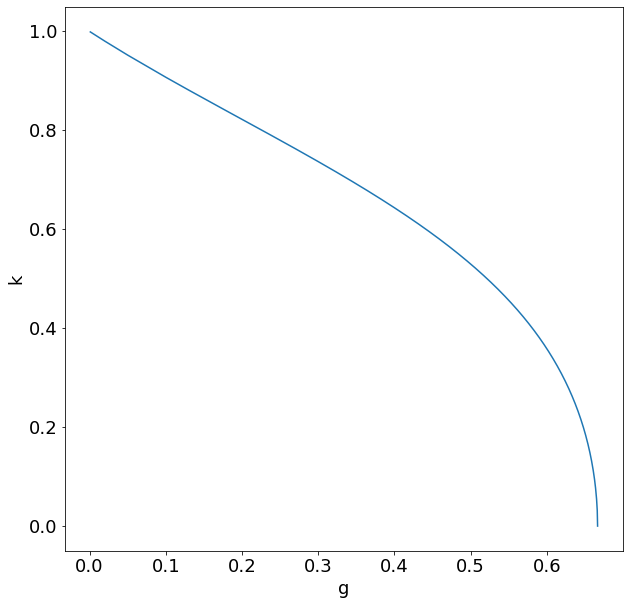

In [5]:
plt.plot([1/g for g,kc in zip(gs, kcrits_) if kc is not None], [kc for kc in kcrits_ if kc is not None])
plt.xlabel("g")
plt.ylabel("k")

In [6]:
hs = np.arange(-2, 2, .001)
kcrits = [[kcrit(g=1.500, h=h) for h in hs]]
for kappa in np.arange(.6, 1, .1):
    kcrits.append([kcrit(g=1/kappa, h=h) for h in hs])

Text(0, 0.5, 'k')

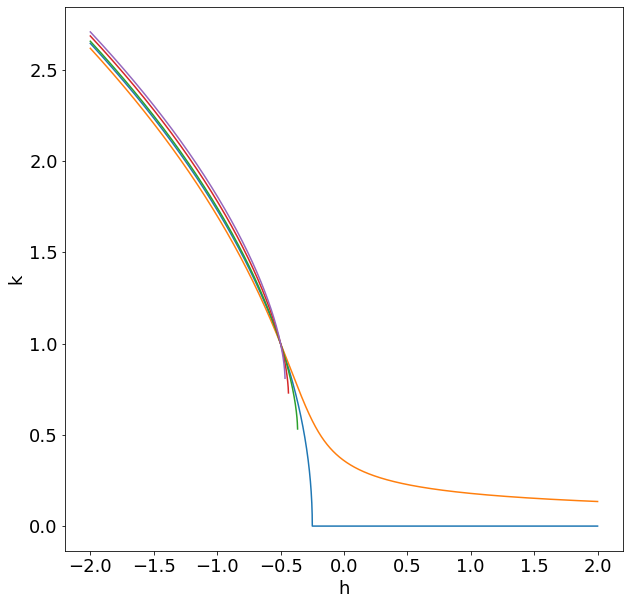

In [7]:
for l in kcrits:
    plt.plot([h for h,kc in zip(hs, l) if kc is not None], [kc for kc in l if kc is not None])
plt.xlabel("h")
plt.ylabel("k")
#plt.xlim((-.7, -.2))

**minima by numerically integrating**

In [8]:
import pandas as pd
import seaborn as sb
import surfaces_and_fields.system_cylinder as cylinder

For H_0 =0 : we are going to extract energy of the system for a range of k, kappa, a

In [9]:
a_s = np.arange(-.99, 1, .01)
ks = np.arange(0.005, 1.4, .01)

In [10]:
if firsttime:
    curvenergy = {}
    for k in ks:
        curvenergya={}
        print(round(k,4))
        cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=kappa, gamma=1, intrinsic_curvature=0)
        for a in a_s:
            energy=cy.calc_bending_energy(amplitude=a)
            curvenergya[round(a,2)]=energy
        curvenergy[round(k,4)]=curvenergya
    curvdata = pd.DataFrame(curvenergy)
    curvdata.to_csv("chapter2data/curvenergytens_tmp.csv")
else:
    curvdata=pd.read_csv("chapter2data/curvenergy_H0.csv", index_col=0)
print(curvdata)

              0.005        0.015        0.025        0.035        0.045  \
-0.99  10873.849186  3624.586928  2174.716819  1553.331334  1208.107426   
-0.98   7682.841726  2560.919672  1536.518740  1097.478000   853.557360   
-0.97   6268.167238  2089.362941  1253.586420   895.385326   696.376076   
-0.96   5424.334506  1808.086556  1084.822019   774.840857   602.620855   
-0.95   4848.170328  1616.032869   969.591054   692.534360   538.606074   
...             ...          ...          ...          ...          ...   
 0.95   4848.170328  1616.032869   969.591054   692.534360   538.606074   
 0.96   5424.334506  1808.086556  1084.822019   774.840857   602.620855   
 0.97   6268.167238  2089.362941  1253.586420   895.385326   696.376076   
 0.98   7682.841726  2560.919672  1536.518740  1097.478000   853.557360   
 0.99  10873.849186  3624.586928  2174.716819  1553.331334  1208.107426   

            0.055       0.065       0.075       0.085       0.095  ...  \
-0.99  988.411550  836.30

In [11]:
if firsttime:
    surfenergy = {}
    for k in ks:
        surfenergya={}
        print(round(k,4))
        cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
        for a in a_s:
            energy=cy.evaluate_A_integral_0(amplitude=a)
            surfenergya[round(a,2)]=energy
        surfenergy[round(k,4)]=surfenergya
    #print(surfenergy)
    surfdata = pd.DataFrame(surfenergy)
    print(surfdata)
    surfdata.to_csv("chapter2data/surfenergy_H0_tmp.csv")
else:
    surfdata=pd.read_csv("chapter2data/surfenergy_H0.csv", index_col=0)
print(surfdata)

             0.005       0.015       0.025       0.035       0.045      0.055  \
-0.99  1029.464153  343.166003  205.913143  147.095323  114.422515  93.633802   
-0.98  1032.883703  344.305737  206.596844  147.583532  114.802078  93.944195   
-0.97  1036.302319  345.445158  207.280355  148.071603  115.181532  94.254496   
-0.96  1039.719517  346.584104  207.963580  148.559467  115.560823  94.564663   
-0.95  1043.134804  347.722413  208.646420  149.047055  115.939897  94.874651   
...            ...         ...         ...         ...         ...        ...   
 0.95  1043.134804  347.722413  208.646420  149.047055  115.939897  94.874651   
 0.96  1039.719517  346.584104  207.963580  148.559467  115.560823  94.564663   
 0.97  1036.302319  345.445158  207.280355  148.071603  115.181532  94.254496   
 0.98  1032.883703  344.305737  206.596844  147.583532  114.802078  93.944195   
 0.99  1029.464153  343.166003  205.913143  147.095323  114.422515  93.633802   

           0.065      0.075

<AxesSubplot:>

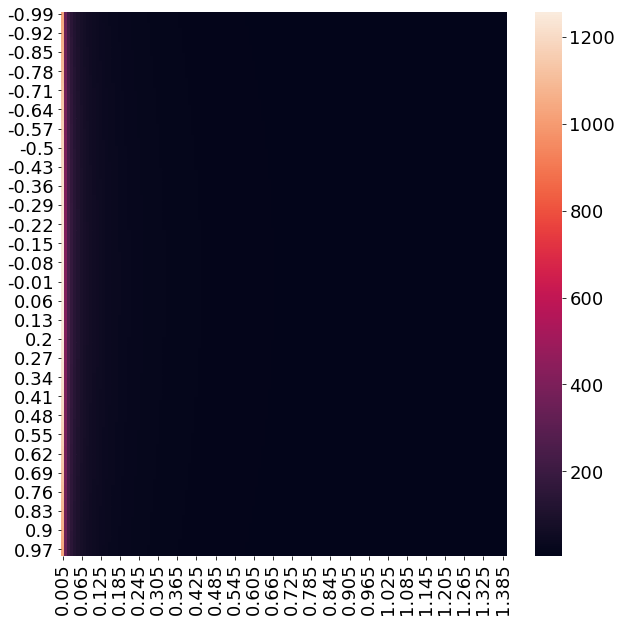

In [12]:
sb.heatmap(surfdata)

<AxesSubplot:>

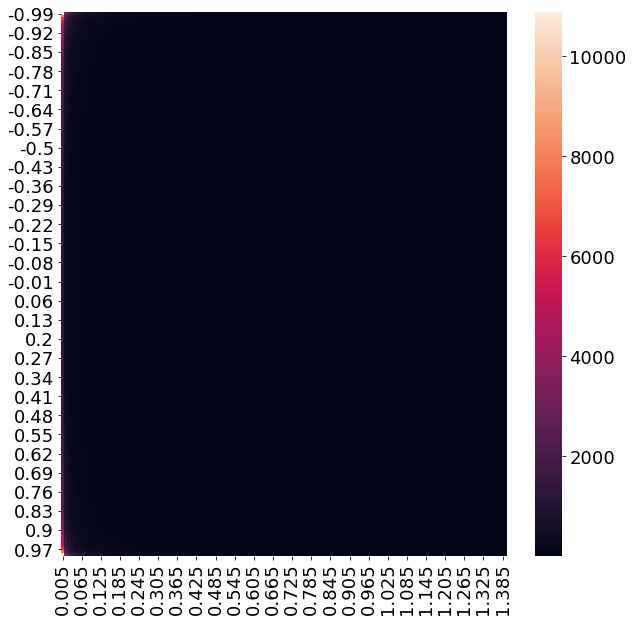

In [13]:
sb.heatmap(curvdata)

In [14]:
if firsttime:
    minima_surf = {}
    for k in surfdata.columns:
        energy_vs_a = surfdata.loc[:,k]
        #print(surfdata.loc[:,k])
        min_a = energy_vs_a.idxmin()
        min_energy = energy_vs_a[min_a]
        minima_surf[k]=((min_a, min_energy))
    #print(minima_surf)
    minima_surf_df = pd.DataFrame(minima_surf)
    minima_surf_df.to_csv("chapter2data/minima_surf_tmp.csv")
else:
    minima_surf_df=pd.read_csv("chapter2data/minima_surf.csv")

In [15]:
if firsttime:
    minima_curv = {}
    for k in curvdata.columns:
        energy_vs_a = curvdata.loc[:,k]
        #print(surfdata.loc[:,k])
        min_a = energy_vs_a.idxmin()
        min_energy = energy_vs_a[min_a]
        minima_curv[k]=((min_a, min_energy))
    #print(minima_curv)
    minima_curv_df=pd.DataFrame(minima_curv)
    minima_curv_df.to_csv("chapter2data/minima_curv_tmp.csv")
else:
    minima_curv_df=pd.read_csv("chapter2data/minima_curv.csv")

In [16]:
#print(minima_surf_df)
plt.plot([float(k) for k in minima_surf_df.columns], [abs(minima_surf_df.iloc[0,k]) for k in range(len(minima_surf_df.columns))], label="shape amplitude minimizing area")
plt.plot([float(k) for k in minima_curv_df.columns], [abs(minima_curv_df.iloc[0,k]) for k in range(len(minima_curv_df.columns))],label="shape amplitude minimizing curvature energy")
plt.legend()
plt.xlabel("k")
plt.ylabel("|a|")

ValueError: could not convert string to float: 'Unnamed: 0'

Text(0, 0.5, 'E')

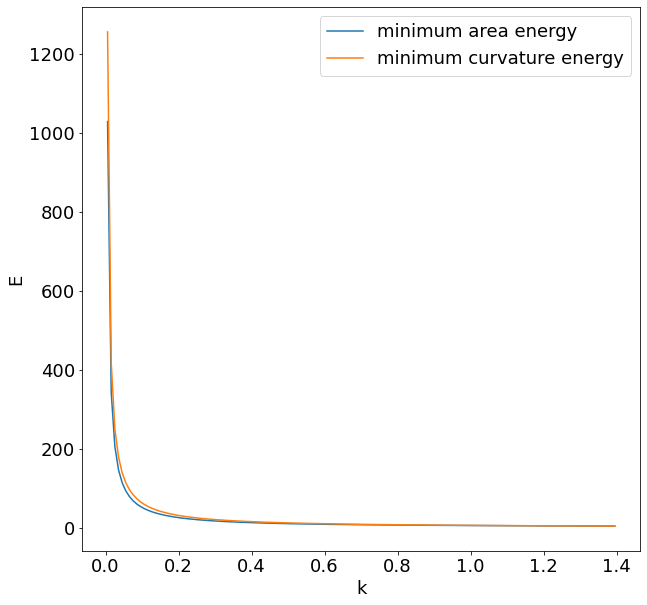

In [50]:
plt.plot([float(k) for k in minima_surf_df.columns], [abs(minima_surf_df.iloc[1,k]) for k in range(len(minima_surf_df.columns))], label="minimum area energy")
plt.plot([float(k) for k in minima_curv_df.columns], [abs(minima_curv_df.iloc[1,k]) for k in range(len(minima_curv_df.columns))],label="minimum curvature energy")
plt.legend()
plt.xlabel("k")
plt.ylabel("E")

Let's go through a range of ratios kappa:gamma and find the minimizing amplitude a and energy E at that minimum, for a range of ks

In [51]:
if firsttime:
    minima_total_as={}
    minima_total_Es={}
    gamma=1
    kappas=np.arange(0,1,.01)
    for kappa in kappas:
        minima_total_as_kappa={}
        minima_total_Es_kappa={}
        for k in curvdata.columns:
            curv_energy_vs_a = curvdata.loc[:,k]
            surf_energy_vs_a = surfdata.loc[:,k]
            total_energy_vs_a = gamma*surf_energy_vs_a+kappa/2*curv_energy_vs_a
            #print(total_energy_vs_a)
            min_a = total_energy_vs_a.idxmin()
            min_energy = total_energy_vs_a[min_a]
            minima_total_as_kappa[k]=abs(min_a)
            #print(min_a)
            minima_total_Es_kappa[k]= min_energy
        minima_total_as[kappa]=minima_total_as_kappa
        minima_total_Es[kappa]=minima_total_Es_kappa
    #print(minima_total)
    df_minima_total_as=pd.DataFrame(minima_total_as)
    df_minima_total_Es=pd.DataFrame(minima_total_Es)
    df_minima_total_as.to_csv("chapter2data/minimizing_a_inkappaandk_tmp.csv")
    df_minima_total_Es.to_csv("chapter2data/minimizing_E_inkappaandk_tmp.csv")
else:
    df_minima_total_as=pd.read_csv("chapter2data/minimizing_a_inkappaandk.csv", index_col=0, dtype=float)
    df_minima_total_Es=pd.read_csv("chapter2data/minimizing_E_inkappaandk.csv", index_col=0, dtype=float)

<AxesSubplot:>

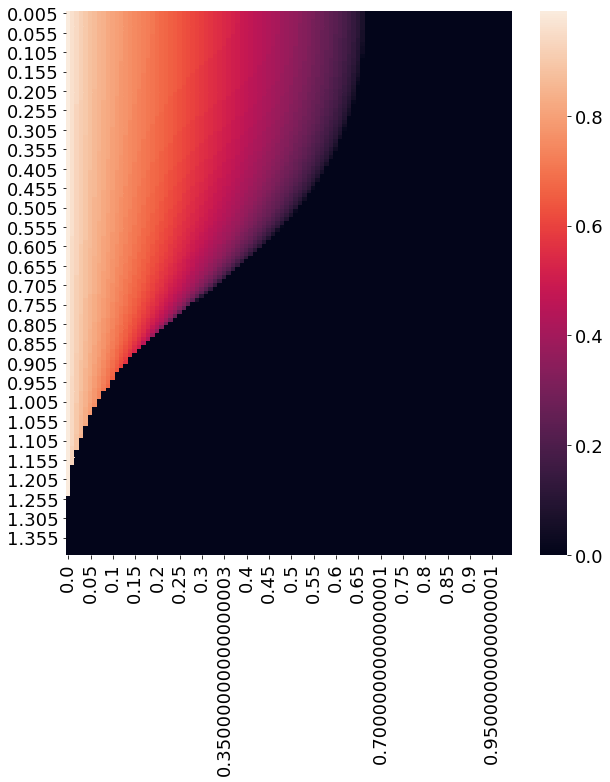

In [52]:
sb.heatmap(df_minima_total_as)

In [54]:
if firsttime:
    minima_total_as_g={}
    minima_total_Es_g={}
    kappa=1
    gammas=np.arange(1,5,.01)
    for gamma in gammas:
        minima_total_as_gamma={}
        minima_total_Es_gamma={}
        for k in curvdata.columns:
            curv_energy_vs_a = curvdata.loc[:,k]
            surf_energy_vs_a = surfdata.loc[:,k]
            total_energy_vs_a = gamma*surf_energy_vs_a+kappa/2*curv_energy_vs_a
            #print(total_energy_vs_a)
            min_a = total_energy_vs_a.idxmin()
            min_energy = total_energy_vs_a[min_a]
            minima_total_as_gamma[k]=abs(min_a)
            #print(min_a)
            minima_total_Es_gamma[k]= min_energy
        minima_total_as_g[gamma]=minima_total_as_gamma
        minima_total_Es_g[gamma]=minima_total_Es_gamma
    df_minima_total_as_g=pd.DataFrame(minima_total_as_g)
    df_minima_total_Es_g=pd.DataFrame(minima_total_Es_g)
    df_minima_total_as_g.to_csv("chapter2data/minimizing_a_ingammaandk_tmp.csv")
    df_minima_total_Es_g.to_csv("chapter2data/minimizing_E_ingammaandk_tmp.csv")
else:
    df_minima_total_as_g=pd.read_csv("chapter2data/minimizing_a_ingammaandk.csv", index_col=0, dtype=float)
    df_minima_total_Es_g=pd.read_csv("chapter2data/minimizing_E_ingammaandk.csv", index_col=0, dtype=float)

<AxesSubplot:>

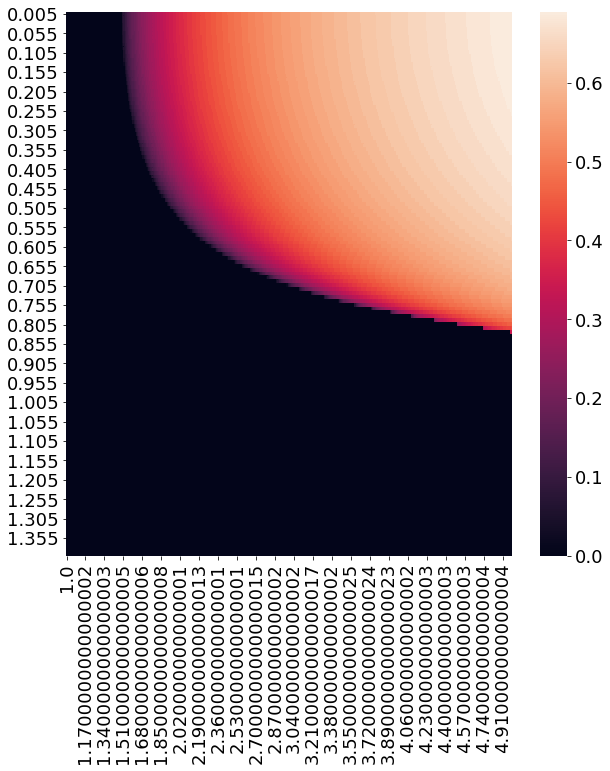

In [55]:
sb.heatmap(df_minima_total_as_g)


Let's make a pretty plot of both views with superimposed pertrubative limit k*

In [61]:
#we have data: gs, kcrits

y_indices,x_indices = df_minima_total_as.shape
print(df_minima_total_as.shape)
#for lineplot 1 scale date from 0 to .95 to indices 0 to x_indices
lineplot_xs_1= [100*(1/g) for g,kc in zip(gs, kcrits_) if kc is not None]
#for lineplot 1 scale date from 1.395 to 0.005 to indices 0 to y_indices
lineplot_ys_1= [100*(1.395-kc) for kc in kcrits_ if kc is not None]

lineplot_xs_2= [100*(g-1) for g,kc in zip(gs, kcrits_) if kc is not None]
lineplot_ys_2= [100*(1.395-kc) for kc in kcrits_ if kc is not None]

(140, 100)


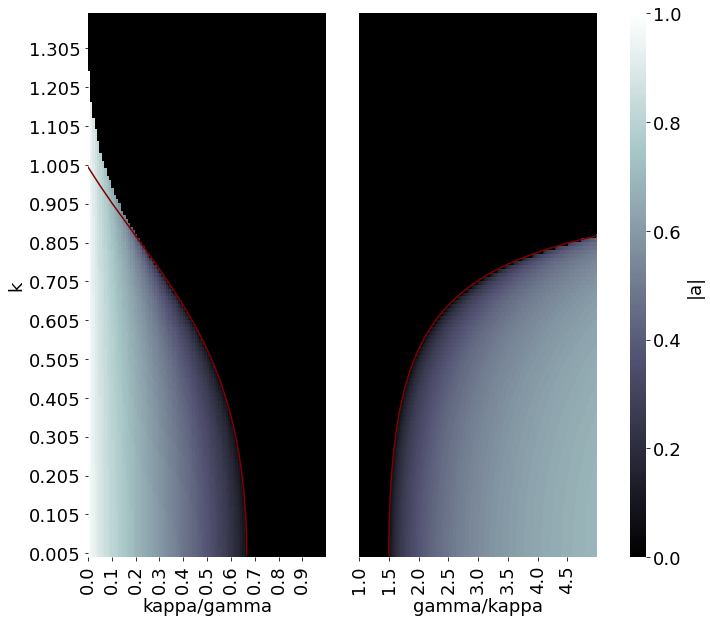

In [65]:
f,(ax1,ax2, axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1.2,1.2,0.08]}) #the last axis is for colorbar
#ax1.get_shared_y_axes().join(ax1,ax2)
ax1.plot(lineplot_xs_1, lineplot_ys_1, color='maroon')
ax1.set_ylim([0, 100*1.395])
ax1.set_xlim([0, 100*.99])
g1 = sb.heatmap(df_minima_total_as[::-1],cmap="bone",cbar=False,ax=ax1, vmax=1, vmin=0)
g1.set_ylabel('k')
g1.set_xlabel('kappa/gamma')
g1.set_xticks([n for n in range(0,100,10)])
g1.set_xticklabels([round(.01*n,3) for n in range(0,100,10)])
ax2.plot(lineplot_xs_2, lineplot_ys_2, color='maroon')
g2 = sb.heatmap(df_minima_total_as_g[::-1],cmap="bone",cbar=True, cbar_kws={'label':'|a|'},
                ax=ax2, cbar_ax=axcb, vmax=1, vmin=0)
#g2.set_ylabel('k')
g2.set_xlabel('gamma/kappa')
g2.set_xticks([n for n in range(0,400,50)])
g2.set_xticklabels([round(1+.01*n,3) for n in range(0,400,50)])

g1.set_yticks([n+9 for n in range(0,140,10)])
g1.set_yticklabels([round(1.305-.01*n,3) for n in range(0,140,10)])
g2.set_yticks([])

plt.savefig("chapter2data/numerical_minima_tmp.png")
plt.show()

Let's look at the region around k=1, kappa/gamma=0
kappa=0:  look at just surf_energy_vs_a

In [67]:
surfdata

,0.005,0.015,0.025,0.035,0.045,0.055,0.065,0.075,0.085,0.095,...,1.305,1.315,1.325,1.335,1.345,1.355,1.365,1.375,1.385,1.395
-0.99,1029.464153,343.166003,205.913143,147.095323,114.422515,93.633802,79.244214,68.694099,60.628348,54.262422,...,4.885607,4.860995,4.836808,4.813035,4.789669,4.766698,4.744114,4.721907,4.700070,4.678593
-0.98,1032.883703,344.305737,206.596844,147.583532,114.802078,93.944195,79.506693,68.921419,60.828761,54.441575,...,4.890610,4.865867,4.841551,4.817652,4.794160,4.771066,4.748360,4.726034,4.704078,4.682485
-0.97,1036.302319,345.445158,207.280355,148.071603,115.181532,94.254496,79.769094,69.148669,61.029109,54.620667,...,4.895466,4.870592,4.846146,4.822120,4.798502,4.775283,4.752455,4.730008,4.707933,4.686223
-0.96,1039.719517,346.584104,207.963580,148.559467,115.560823,94.564663,80.031378,69.375815,61.229365,54.799674,...,4.900174,4.875167,4.850591,4.826436,4.802692,4.779348,4.756397,4.733828,4.711633,4.689804
-0.95,1043.134804,347.722413,208.646420,149.047055,115.939897,94.874651,80.293508,69.602826,61.429499,54.978571,...,4.904732,4.879592,4.854885,4.830600,4.806728,4.783259,4.760183,4.737492,4.715176,4.693228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.95,1043.134804,347.722413,208.646420,149.047055,115.939897,94.874651,80.293508,69.602826,61.429499,54.978571,...,4.904732,4.879592,4.854885,4.830600,4.806728,4.783259,4.760183,4.737492,4.715176,4.693228
0.96,1039.719517,346.584104,207.963580,148.559467,115.560823,94.564663,80.031378,69.375815,61.229365,54.799674,...,4.900174,4.875167,4.850591,4.826436,4.802692,4.779348,4.756397,4.733828,4.711633,4.689804
0.97,1036.302319,345.445158,207.280355,148.071603,115.181532,94.254496,79.769094,69.148669,61.029109,54.620667,...,4.895466,4.870592,4.846146,4.822120,4.798502,4.775283,4.752455,4.730008,4.707933,4.686223
0.98,1032.883703,344.305737,206.596844,147.583532,114.802078,93.944195,79.506693,68.921419,60.828761,54.441575,...,4.890610,4.865867,4.841551,4.817652,4.794160,4.771066,4.748360,4.726034,4.704078,4.682485


<AxesSubplot:>

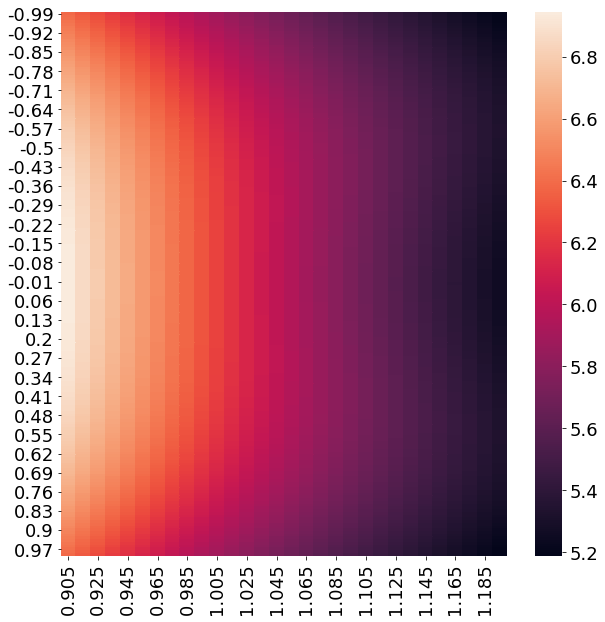

In [72]:
sb.heatmap(surfdata.iloc[:, 90:120])

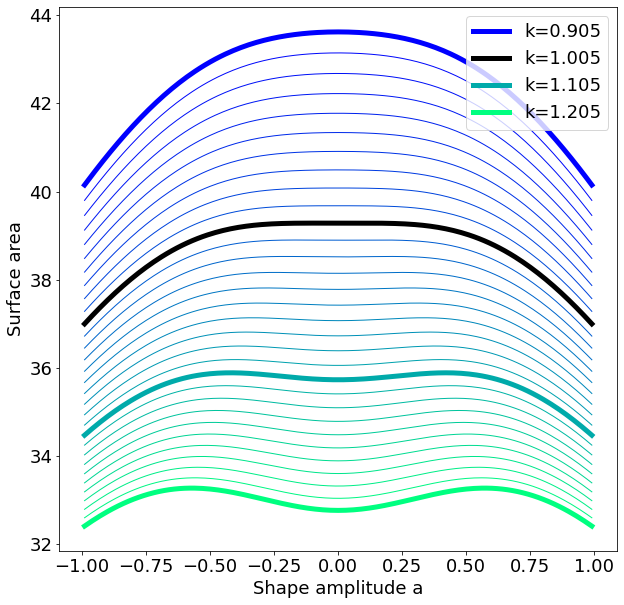

In [97]:
range1=90
range2=121
cols = plt.cm.winter([(float(surfdata.columns[k_index])-float(surfdata.columns[range1]))/
                      (float(surfdata.columns[range2-1])-float(surfdata.columns[range1]))  
                      for k_index in range(90,121)])    
for index,k_index in enumerate(range(90,121)):
    k_line=surfdata.iloc[:,k_index]*2*math.pi
    if k_index%10==0:
        if k_index==100:
            plt.plot(k_line, label="k="+surfdata.columns[k_index], linewidth=5, color='black')
        else:
            plt.plot(k_line, label="k="+surfdata.columns[k_index], linewidth=5, color=cols[index])
    else:
        plt.plot(k_line, linewidth=1,color=cols[index])
plt.xlabel("Shape amplitude a")
plt.ylabel("Surface area")
plt.legend()
#plt.savefig("./chapter2data/surfarea_discrepancy_tmp.png")
plt.show()

I also want to numerically integrate \int cn^2|A_theta|^2 |Psi_0|^2 dS, the energy from field if it stayed perfectly ordered.  (To first order, the differene in this energy is |alpha|cn^2a^2/2u per unperturbed area). 

In [27]:
firsttime=True
a_s = np.arange(0, 1, .01)
ks = np.arange(.1, 1.4, .1)
if firsttime:
    straightfieldenergy = {}
    for k in ks:
        straightfieldenergya={}
        print(round(k,4))
        cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=kappa, gamma=1, intrinsic_curvature=0)
        for a in a_s:
            Ath2sqrtg = lambda z: cy.A_theta(amplitude=a, z=z)**2*cy.sqrt_g_z(amplitude=a, z=z)/cy.sqrt_g_theta(amplitude=a, z=z)
            intAth2, error = scipy.integrate.quad(Ath2sqrtg, 0, 2*math.pi/k) #Ath is real - |A_th| = Ath*Ath/sqrt(gthth)^2
            straightfieldenergya[round(a,2)]=intAth2
        straightfieldenergy[round(k,4)]=straightfieldenergya
    sfdata = pd.DataFrame(straightfieldenergy)
    sfdata.to_csv("chapter2data/straightfieldenergy_tmp.csv")
else:
    sfdata=pd.read_csv("chapter2data/straightfieldenergy.csv", index_col=0)
print(sfdata)


0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
1.1
1.2
1.3
           0.1       0.2       0.3       0.4       0.5       0.6       0.7  \
0.00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.01  0.000031  0.000063  0.000094  0.000126  0.000157  0.000188  0.000220   
0.02  0.000126  0.000251  0.000377  0.000503  0.000628  0.000754  0.000880   
0.03  0.000283  0.000565  0.000848  0.001131  0.001414  0.001696  0.001979   
0.04  0.000503  0.001005  0.001508  0.002010  0.002513  0.003015  0.003518   
...        ...       ...       ...       ...       ...       ...       ...   
0.95  0.358019  0.711969  1.058062  1.393025  1.714255  2.019874  2.308715   
0.96  0.373581  0.742922  1.104079  1.453650  1.788932  2.107987  2.409615   
0.97  0.391437  0.778455  1.156946  1.523370  1.874923  2.209597  2.526158   
0.98  0.412890  0.821171  1.220562  1.607377  1.978702  2.332457  2.667368   
0.99  0.441304  0.877797  1.305011  1.719103  2.117040  2.496661  2.856645   

           

Still need to multiply this by a factor cn^2|sqrt(alpha/u)|^2 (can be taken out of the integral) for the specific field